In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Slider, CustomJS, Legend, LegendItem
from bokeh.layouts import column
from bokeh.palettes import Category20
from bokeh.palettes import TolRainbow
from bokeh.transform import factor_cmap
from bokeh.plotting import output_notebook

from itertools import cycle
# Ensure Bokeh plots are displayed in the notebook
output_notebook()

Loading BokehJS ...

# Vizual identity prep

In [142]:
#font_prop = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\source-sans-pro.ttf')
font_reg = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Regular.otf")
font_bold = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Bold.otf")
font_italic = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-It.ttf")
font_light = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf")

In [54]:
sbt_palette = [
    "#F26749",  # Crab
    "#5CB85C", # Greenery
   # "#F5B7B1",  # Warm Blush
    "#83A5F2",  # Vista blue
    "#204ECF",  # deep ocean
    "#EA9836",  # butterscotch
    # Pastel extended palette
    "#F28C70",  # Lighter Crab
    "#B23A1D",  # Darker Crab
    "#FADBD8",  # Lighter Warm Blush
    "#E5989B",  # Deeper Warm Blush
    "#A1B6F5",  # Lighter Vista Blue
    "#516FD9",  # Midpoint Blue
    "#122E8A",  # Darker Deep Ocean
    "#7C9BF2",  # Muted Vista Blue
    "#F9C784",  # Lighter Butterscotch
    "#C86F08",  # Deeper Butterscotch
    "#F2E1DC",  # Soft Neutral
    "#F4C2C2",  # Warm Neutral
    "#CBD4F7",  # Soft Cool Tone
    "#BFD0E5",  # Neutral Blue Tint
    "#D47A5F",  # Earthy Warm Blend
    "#8C9EFF",  # Punchy Cool Accent
    "#F7D59C",  # Pale Orange Glow
    "#F7A76C",  # Vibrant Warm
    "#D44A1C",  # Bold Warm Tone
    "#8390F2",  # Cool Complement
]

# Data prep

In [41]:
filepath = r'C:\Users\AnjaBrocklehurst\Documents\Data\SBTi Dataviz\ByCompany.csv'
Comp = pd.read_csv(filepath, sep=';')
filepath = r'C:\Users\AnjaBrocklehurst\Documents\Data\SBTi Dataviz\ByTargets.csv'
Targ = pd.read_csv(filepath, sep=';')

In [42]:
#Targ.info()
#Comp.info()
Targ = Targ.copy()
Comp = Comp.copy()

In [43]:
# Mapping of sectors to categories
sector_category_map = {
    'Ground Transportation - Railroads Transportation': 'Transportation',
    'Semiconductors and Semiconductors Equipment': 'Technology',
    'Air Freight Transportation and Logistics': 'Transportation',
    'Trading Companies and Distributors, and Commercial Services and Supplies': 'Commercial Services',
    'Water Transportation - Water Transportation': 'Transportation',
    'Food and Beverage Processing': 'Food and Beverage',
    'Telecommunication Services': 'Telecommunication',
    'Construction and Engineering': 'Construction',
    'Pharmaceuticals, Biotechnology and Life Sciences': 'Healthcare',
    'Professional Services': 'Professional Services',
    'Containers and Packaging': 'Packaging',
    'Real Estate': 'Real Estate',
    'Consumer Durables, Household and Personal Products': 'Consumer Products',
    'Electric Utilities and Independent Power Producers and Energy Traders (including Fossil, Alternative and Nuclear Energy)': 'Energy',
    'Retailing': 'Retail',
    'Mining - Iron, Aluminum, Other Metals': 'Mining',
    'Textiles, Apparel, Footwear and Luxury Goods': 'Consumer Products',
    'Software and Services': 'Technology',
    'Hotels, Restaurants and Leisure, and Tourism Services': 'Hospitality',
    'Electrical Equipment and Machinery': 'Manufacturing',
    'Food Production - Agricultural Production': 'Food Production',
    'Building Products': 'Construction',
    'Food and Staples Retailing': 'Retail',
    'Automobiles and Components': 'Automotive',
    'Forest and Paper Products - Forestry, Timber, Pulp and Paper, Rubber': 'Forestry and Paper Products',
    'Tobacco': 'Tobacco',
    'Solid Waste Management Utilities': 'Utilities',
    'Chemicals': 'Chemicals',
    'Construction Materials': 'Construction',
    'Technology Hardware and Equipment': 'Technology',
    'Mining - Other (Rare Minerals, Precious Metals and Gems)': 'Mining',
    'Water Utilities': 'Utilities',
    'Homebuilding': 'Construction',
    'Ground Transportation - Highways and Railtracks': 'Transportation',
    'Food Production - Animal Source Food Production': 'Food Production',
    'Healthcare Equipment and Supplies': 'Healthcare',
    'Air Transportation - Airport Services': 'Transportation',
    'Media': 'Media',
    'Banks, Diverse Financials, Insurance': 'Financial Services',
    'Ground Transportation - Trucking Transportation': 'Transportation',
    'Specialized Consumer Services': 'Consumer Services',
    'Specialized Financial Services, Consumer Finance, Insurance Brokerage Firms': 'Financial Services',
    'Healthcare Providers and Services, and Healthcare Technology': 'Healthcare',
    'Water Transportation - Ports and Services': 'Transportation',
    'Air Transportation - Airlines': 'Transportation',
    'Aerospace and Defense': 'Defense',
    'Tires': 'Automotive',
    'Education Services': 'Education',
    'Gas Utilities': 'Utilities'
}

# Function to map sectors to categories
def map_category(sector):
    return sector_category_map.get(sector, 'Unknown')
# Apply the function to the 'sector' column
Targ['sectorCat'] = Targ['sector'].apply(map_category)
Comp['sectorCat'] = Comp['sector'].apply(map_category)
# Display the DataFrame
Targ['sectorCat'].unique()
# Place sectorCat next to sector in the DataFrame
Targ = Targ[['sector', 'sectorCat'] + [col for col in Targ.columns if col not in ['sector', 'sectorCat']]]
Comp = Comp[['sector', 'sectorCat'] + [col for col in Comp.columns if col not in ['sector', 'sectorCat']]]

## Editing Targ and Comp df

In [44]:
#make Targ['date_published'] a datetime object
Targ['date_published'] = pd.to_datetime(Targ['date_published'], errors='coerce')
#Seperate year from date_published
Targ['Comitted year'] = Targ['date_published'].dt.year
#Sort targ by year
Targ = Targ.sort_values(by='Comitted year', ascending=True)
#Limit to 2015-2024
Targ = Targ[Targ['Comitted year'].between(2015, 2024)]
#Check if year is sorted correctly
Targ['Comitted year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [45]:
# Remove duplicates of stbi_id in Targ to make counting easier
Targ = Targ.drop_duplicates(subset=['company_name'])

In [46]:
Comp['date_updated'] = pd.to_datetime(Comp['date_updated'], errors='coerce')
#isolating year in Comp
Comp['year_updated'] = Comp['date_updated'].dt.year
Comp=Comp.sort_values(by='year_updated', ascending=True)
Comp = Comp[Comp['year_updated'].between(2015, 2024)]
#Check if year is sorted correctly
Comp['year_updated'].unique()

C:\Users\AnjaBrocklehurst\AppData\Local\Temp\ipykernel_17876\2763977560.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Comp['date_updated'] = pd.to_datetime(Comp['date_updated'], errors='coerce')


array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

# Prep of DK data

In [ ]:
#create dataframe with only locations with denmark
Targ_dk = Targ[Targ['location'].str.contains('Denmark', na=False)]
Comp_dk = Comp[Comp['location'].str.contains('Denmark', na=False)]


# Viz of DK data

In [48]:
Comp_dk

,sector,sectorCat,sbti_id,company_name,organization_type,location,region,near_term_status,near_term_target_classification,near_term_target_year,long_term_status,long_term_target_classification,long_term_target_year,net_zero_status,net_zero_year,reason_for_extension_or_removal,date_updated,year_updated
866,Food and Beverage Processing,Food and Beverage,40000306,Carlsberg Group,Corporate,Denmark,Europe,Targets set,1.5°C,2030,NaN,NaN,NaN,Commitment removed,NaN,Expired commitment,2019-12-01,2019
4365,Building Products,Construction,40007771,The VELUX Group,Corporate,Denmark,Europe,Targets set,1.5°C,2030,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-10,2020
4630,Electrical Equipment and Machinery,Manufacturing,40011359,Vestas Wind Systems,Corporate,Denmark,Europe,Targets set,1.5°C,2030,NaN,NaN,NaN,Commitment removed,NaN,Expired commitment,2020-12-01,2020
3652,Building Products,Construction,40010558,Rockwool Group,Corporate,Denmark,Europe,Targets set,Well-below 2°C,2034,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-10,2020
1082,Food and Staples Retailing,Retail,40002421,Coop amba,Corporate,Denmark,Europe,Targets set,1.5°C,2030,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-09,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,"Hotels, Restaurants and Leisure, and Tourism S...",Hospitality,40005995,TIVOLI A/S,Corporate,Denmark,Europe,Targets set,1.5°C,2030,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-25,2024
6815,Professional Services,Professional Services,40012345,Kromann Reumert I/S,Corporate,Denmark,Europe,Targets set,1.5°C,2030,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-08,2024
7235,Professional Services,Professional Services,40003500,HUMANIZER A/S,SME,Denmark,Europe,Targets set,1.5°C,2030,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-11,2024
7232,"Consumer Durables, Household and Personal Prod...",Consumer Products,40013965,Dk International Interior A/S,SME,Denmark,Europe,Targets set,1.5°C,2030,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-11,2024


In [ ]:
#sorting the number of companies with validated targets away from companies with commited or removed commitment
org = Comp_dk[['organization_type', 'near_term_status', 'long_term_status', ' net_zero_status', 'year_updated']].reset_index(drop=True)

# Create an empty list to store rows for the result
rows = []

# Loop through the rows of the dataset
for index, row in org.iterrows():
    # Check if "Targets set" exists in any of the relevant columns
    if any(status == "Targets set" for status in [row["near_term_status"], row["long_term_status"], row[" net_zero_status"]]):
        # Append the row's relevant data to the list
        rows.append({
            "organization_type": row["organization_type"],
            "year_updated": row["year_updated"]
        })

# Convert the list of rows into a new DataFrame
org_sorted = pd.DataFrame(rows)

#count the number of companies within each organisational type with validated targets 
org_growth = org_sorted.groupby(['organization_type', 'year_updated']).size().reset_index(name='count') 

# Display the new DataFrame
print(Org_sorted)

    organization_type  year_updated
0           Corporate          2019
1           Corporate          2020
2           Corporate          2020
3           Corporate          2020
4           Corporate          2021
..                ...           ...
206         Corporate          2024
207         Corporate          2024
208               SME          2024
209               SME          2024
210               SME          2024

[211 rows x 2 columns]


In [ ]:
org_growth = org_sorted.groupby(['organization_type', 'year_updated']).size().reset_index(name='count')

,organization_type,year_updated,count
0,Corporate,2019,1
1,Corporate,2020,3
2,Corporate,2021,7
3,Corporate,2022,11
4,Corporate,2023,22
5,Corporate,2024,36
6,Financial Institution,2022,2
7,Financial Institution,2023,2
8,Financial Institution,2024,4
9,SME,2021,4


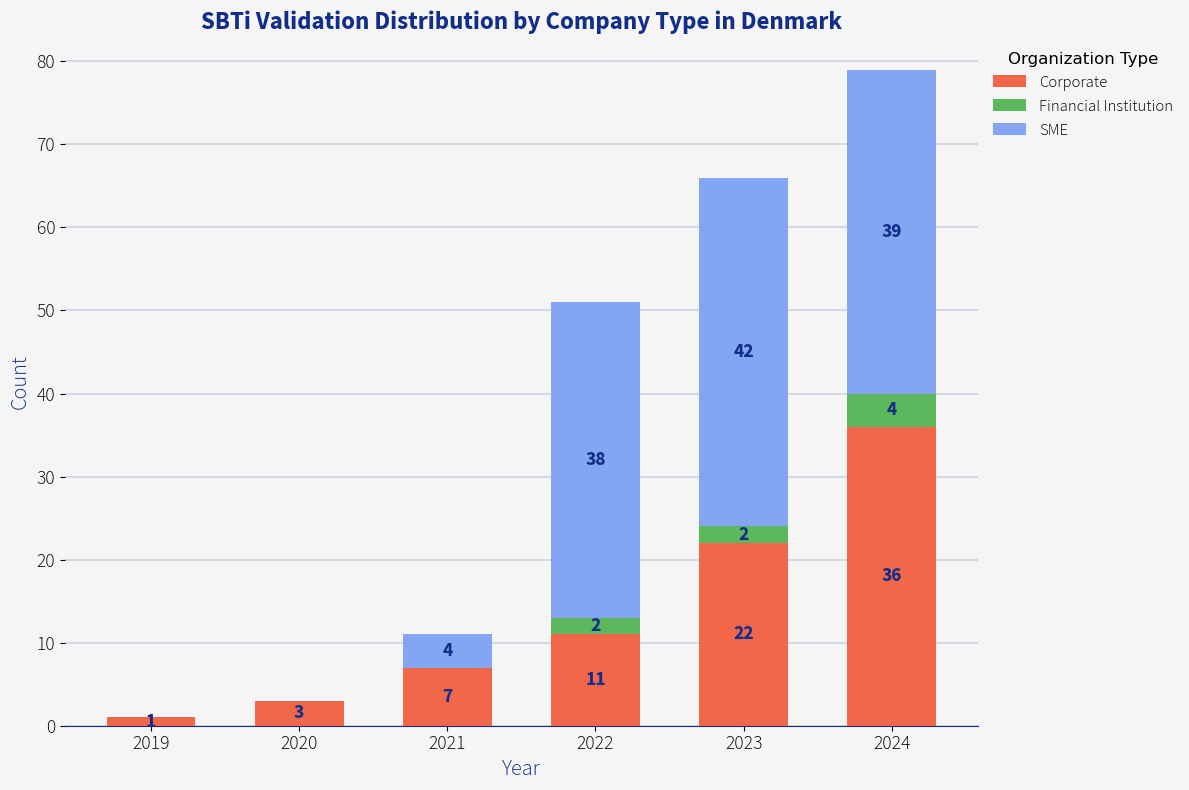

In [158]:
# Pivot the data to prepare it for stacked bar plotting
pivot_data = org_growth.pivot(index="year_updated", columns="organization_type", values="count").fillna(0)

# Sort by year
pivot_data = pivot_data.sort_index()

# Plot background color and bar color
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(12, 8))  # Set fixed plot size (width, height)

# Adjust the width of the bars here to change the distance between them
bar_width = 0.6  # Change this value to make bars closer (lower value) or farther apart (higher value)

# Plot stacked bars
bottom_vals = None
for i, col in enumerate(pivot_data.columns):
    if bottom_vals is None:
        bars = ax.bar(pivot_data.index, pivot_data[col], color=sbt_palette[i], zorder=3, width=bar_width, label=col)
        bottom_vals = pivot_data[col]
    else:
        ax.bar(pivot_data.index, pivot_data[col], color=sbt_palette[i], zorder=3, width=bar_width, label=col, bottom=bottom_vals)
        bottom_vals += pivot_data[col]

# Set facecolor
ax.set_facecolor("#f5f5f5")

# Set title with font properties
ax.set_title("SBTi Validation Distribution by Company Type in Denmark", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.set_ylabel("Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)

# Add data labels to the stacked bars
for bar_group in ax.containers:
    for bar in bar_group:
        if bar.get_height() > 0:  # Only label non-zero bars
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + bar.get_height() / 2, 
                f'{int(bar.get_height())}', 
                ha='center', va='center', fontsize=14, color="#122E8A", fontproperties=font_bold
            )

# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)
font_legend = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf", size=12)  # Set the font size here


# Add legend
ax.legend(
    title="Organization Type", 
    loc="upper left", 
    bbox_to_anchor=(1, 1), 
    frameon=False, 
    prop=font_legend,
    title_fontsize=12
)

plt.tight_layout()
plt.show()

# industires in denmark

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), facecolor="#f5f5f5")  # Set figure size and background color
ax.set_facecolor("#f5f5f5")  # Set axis background color

bubble_plot = sns.scatterplot(
    data=sector_growth,
    x="Comitted year",
    y="sectorCat",
    size="count",
    sizes=(50, 500),
    alpha=0.7,
    ax=ax  # Use the same axis
)

# Add horizontal gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7, color="#146A4A", zorder=0)

# Customize the plot
bubble_plot.set_title("Bubble Plot of Sector Growth Over the Years", fontproperties=font_bold, fontsize=16, fontweight='bold', color="#0c402c")
bubble_plot.set_xlabel("Comitted Year", fontproperties=font_reg, fontsize=14, color="#0c402c")
bubble_plot.set_ylabel("Sector Category", fontproperties=font_reg, fontsize=14, color="#0c402c")

# Customize tick parameters
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)
for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)

# Customize legend
legend = ax.legend(title="Count of Entries", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10, frameon=False, ncol=1 , columnspacing=10)
for text in legend.get_texts():
    text.set_fontproperties(font_light)
legend.get_title().set_fontproperties(font_bold)

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#146A4A")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()